In [2]:
import sys
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
# from keras.utils.vis_utils import plot_model

In [3]:
NoS = 150

In [4]:
X = np.random.uniform(0, 2 * np.pi, size=(NoS, 1))
Y = np.sin(X) + np.random.normal(0, 0.3, size=(NoS, 1))

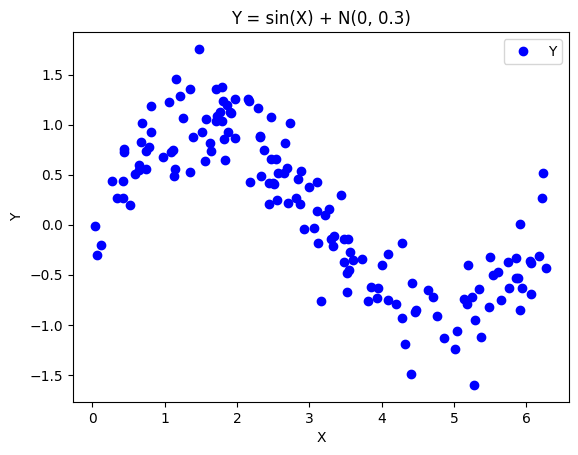

In [5]:
plt.figure()
plt.plot(X, Y, 'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y = sin(X) + N(0, 0.3)')
plt.legend('Y = f(x)')
plt.show()

In [6]:
model = Sequential()
model.add(Dense(5, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [7]:
optim = Adam(learning_rate=0.01,
             beta_1=0.9,
             beta_2=0.999,
             epsilon=1e-07)
model.compile(optimizer=optim, loss='mean_squared_error', metrics=['mean_squared_error'])

In [8]:
hist = model.fit(X, Y, epochs=250, verbose=1, batch_size=150, validation_split=0.2)

Epoch 1/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.4972 - mean_squared_error: 0.4972 - val_loss: 0.4865 - val_mean_squared_error: 0.4865
Epoch 2/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.4520 - mean_squared_error: 0.4520 - val_loss: 0.4349 - val_mean_squared_error: 0.4349
Epoch 3/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.4318 - mean_squared_error: 0.4318 - val_loss: 0.4053 - val_mean_squared_error: 0.4053
Epoch 4/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.4182 - mean_squared_error: 0.4182 - val_loss: 0.3856 - val_mean_squared_error: 0.3856
Epoch 5/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.4015 - mean_squared_error: 0.4015 - val_loss: 0.3699 - val_mean_squared_error: 0.3699
Epoch 6/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.3805 - mean_squared_error: 0.3805 - val_loss: 0.3566 - val_mean_squared_error: 0.3566
Epoch 7/250
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.3572 - mean_squared_error: 0.3572 - val_loss: 0.3456 - val_mean_sq

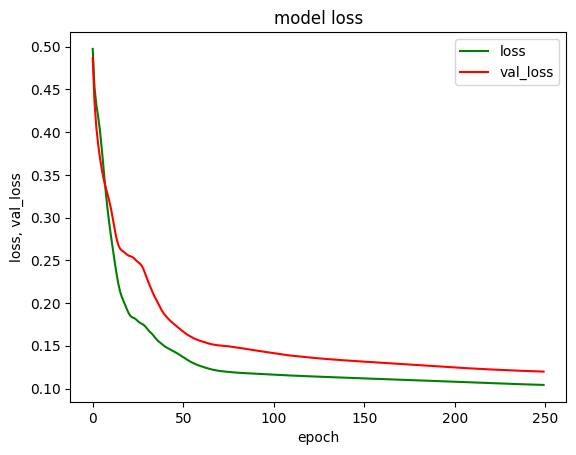

In [9]:
plt.figure()
plt.plot(hist.history['loss'], '-g', label='loss')
plt.plot(hist.history['val_loss'], '-r', label='val_loss')
plt.title('model loss')
plt.ylabel('loss, val_loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])

In [10]:
YPred = model.predict(X)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Text(0, 0.5, 'Y, YPred')

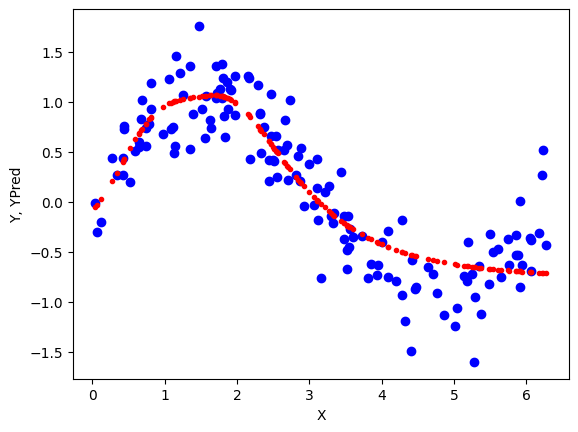

In [11]:
plt.figure()
plt.plot(X, Y, 'bo', label='Y')
plt.plot(X, YPred, 'r.', label='YPred')
plt.xlabel('X')
plt.ylabel('Y, YPred')

In [12]:
XTest = np.random.uniform(0, 2 * np.pi, size=(NoS, 1))
YTest = np.sin(XTest) + np.random.normal(0, 0.3, size=(NoS, 1))

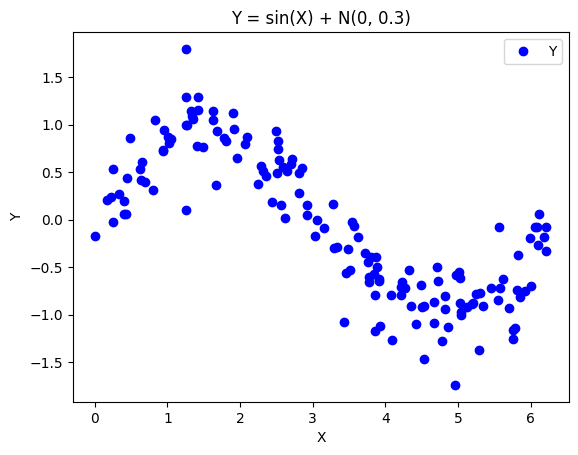

In [13]:
plt.figure()
plt.plot(XTest, YTest, 'bo', label='Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y = sin(X) + N(0, 0.3)')
plt.legend('Y = f(x)')

In [14]:
YTestPred = model.predict(XTest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


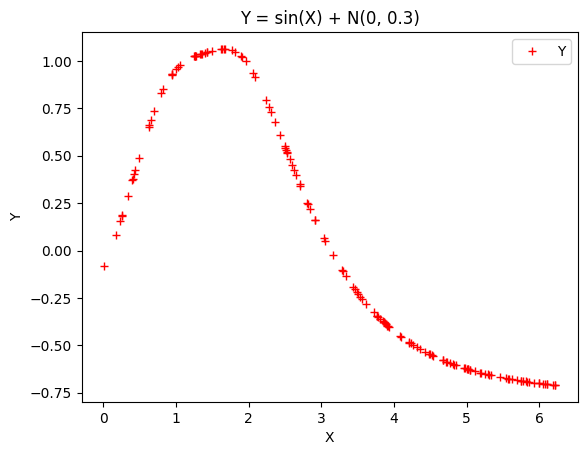

In [15]:
plt.figure()
plt.plot(XTest, YTestPred, 'r+', label='Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Y = sin(X) + N(0, 0.3)')
plt.legend('Y = f(x)')